NLP_df_labeled 
ggl sheet: NLP_df_unlimit_final_more_for_upload     


In [7]:
'''! pip install pandas
! pip install keras
! pip install pythainlp
! pip install scikit-learn
! pip install numpy
! pip install matplotlib
! pip install seaborn'''


'! pip install pandas\n! pip install keras\n! pip install pythainlp'

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from pythainlp.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from pythainlp.corpus import thai_stopwords

In [2]:
def stopwords_rm(text):
    stopwords = set(thai_stopwords())
    stopwords.update(["nan", "-", "_", "", " ", "฿" ,"ค่ะ", "ครับ", "จ้า"])  # Add more stopwords as needed

    # Remove stopwords from the text
    cleaned_text = ' '.join(word for word in text.split() if word not in stopwords)
    return cleaned_text


def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [3]:
df_all = pd.read_csv("./df_y4s2_v1_Natt48.csv") #have chad chat 48 true entries


In [4]:
df_all

,index,username,tweet_id,tweet_text,translated_text,org_step_1,org_step_2,relevant,category,query,datetime_of_tweet,datetime_of_query,link,mentioned_location,location,image,Chadchad
0,040,dohyunjinmin,1.723873e+18,เคยเดินจาก bts วัดพระศรีฯไปสายสีแดงหลักสี่ ระย...,Used to walk from BTS Wat Phra Si to the Laksi...,สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-11-13 1:20:19,2023-11-16 15:25:10,https://twitter.com/dohyunjinmin/status/172387...,พระนคร,0.0,[],no
1,048,Simmons37496127,1.723770e+18,เคยเดินจากเซนทรัลลาดพร้าวไปพหลโยธิน 34 คือไม่...,I once walked from Central Ladprao to Phahon Y...,สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",2023-11-12 18:28:11,2023-11-16 14:52:12,https://twitter.com/Simmons37496127/status/172...,ลาดพร้าว,NaN,[],no
2,056,xbiiryxxn,1.723708e+18,เคยเดินจากห้วยขวางไปสุทธิสาร สรุปเดินเหยียบฟุต...,Used to walk from Huai Khwang to Sutthisan. In...,สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 14:21:11,2023-11-16 15:20:42,https://twitter.com/xbiiryxxn/status/172370751...,ห้วยขวาง,NaN,[],no
3,062,BAROCTARISREAL,1.723677e+18,อยู่เกาหลีเดินสะบัด แดกเท่าไหรก็ นน ไม่ขึ้น กล...,"In Korea, I walked so hard, no matter how much...",สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 12:18:12,2023-11-16 15:20:42,https://twitter.com/BAROCTARISREAL/status/1723...,ห้วยขวาง,NaN,[],no
4,068,ssssxsaii,1.723592e+18,บรรทัดทองจะน่าเดินกว่านี้ถ้า\n-ทำทางเดินใหม่ไม...,Banthat Thong would be more worth walking arou...,สนง.เทศกิจ,สนง.เทศกิจ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",2023-11-12 6:41:45,2023-11-16 15:43:02,https://twitter.com/ssssxsaii/status/172359189...,บรรทัดทอง,NaN,[],no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,c44,2024-DD3TDE,NaN,แจ้งไปกี่รอบก็เหมือนเดิม กวนขันวินัยจราจรได้ด...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
2795,c45,2024-46XFZF,NaN,ร้องเรียนทางเท้าชำรุด เป็นหลุมเป็นบ่อ หลายจุด ...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
2796,c46,WKN67V,NaN,ปัญหา: ตลอดทั้งซอยดังกล่าว พบเห็นมีการต่อเติมอ...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
2797,c47,WLWMXA,NaN,ปัญหา: ในซอยดังกล่าว ต้องการให้หน่วยงานที่เกี่...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes


In [5]:
df_all[df_all['relevant'] == False].shape[0]


2543

random drop false 2287 for resolve imbalance data

In [6]:
df_a = df_all

np.random.seed(0)

false_rows = df_a[df_a['relevant'] == False]
rows_to_drop = false_rows.sample(n=2287, random_state=42)

# Drop the selected rows from the DataFrame
df_dropped = df_a.drop(rows_to_drop.index)
df_dropped['relevant'].value_counts()
df_a = df_dropped

In [7]:
#df_a = df_all if want to use all
df_a['relevant'].value_counts() #org can only be English

relevant
True     256
False    256
Name: count, dtype: int64

In [42]:
#df_a = df_dropped
#df_a = df_all #if use from the sheet
                
df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
df_a['cleaned'] = df_a['combined'].apply(deEmojify)
df_a['cleaned'] = df_a['cleaned'].apply(stopwords_rm) 
df_a['split_cleaned'] = df_a.apply(lambda row: word_tokenize(row['cleaned'],engine="newmm",keep_whitespace=False), axis=1)

#newmm cuts better than nemm-safe ศร, ีฯ ค่,ะ #attacut is virus
#try other engine or break larger, add space in between  
#df_a['split_text2'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm-safe",keep_whitespace=False), axis=1)'''

https://pythainlp.github.io/dev-docs/api/tokenize.html

In [43]:
df_a['relevance_nlp'] = df_a['relevant'].apply(lambda x: 'relevant' if x else 'not relevant')

In [44]:
df_a

,index,username,tweet_id,tweet_text,translated_text,org_step_1,org_step_2,relevant,category,query,...,mentioned_location,location,image,Chadchad,split_text,combined,cleaned,split_cleaned,relevance_nlp,word_length
0,040,dohyunjinmin,1.723873e+18,เคยเดินจาก bts วัดพระศรีฯไปสายสีแดงหลักสี่ ระย...,Used to walk from BTS Wat Phra Si to the Laksi...,สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",...,พระนคร,0.0,[],no,"[เคย, เดิน, จาก, bts, วัด, พระ, ศรี, ฯ, ไป, สา...",เคย เดิน จาก bts วัด พระ ศรี ฯ ไป สาย สีแดง หล...,เดิน bts วัด พระ ศรี สาย สีแดง หลัก สี่ ระยะทา...,"[เดิน, bts, วัด, พระ, ศรี, สาย, สีแดง, หลัก, ส...",relevant,31
1,048,Simmons37496127,1.723770e+18,เคยเดินจากเซนทรัลลาดพร้าวไปพหลโยธิน 34 คือไม่...,I once walked from Central Ladprao to Phahon Y...,สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",...,ลาดพร้าว,NaN,[],no,"[เคย, เดิน, จาก, เซ, นท, รัล, ลาดพร้าว, ไป, พห...",เคย เดิน จาก เซ นท รัล ลาดพร้าว ไป พหลโยธิน 34...,เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อา...,"[เดิน, เซ, นท, รัล, ลาดพร้าว, พหลโยธิน, 34, ไห...",relevant,27
2,056,xbiiryxxn,1.723708e+18,เคยเดินจากห้วยขวางไปสุทธิสาร สรุปเดินเหยียบฟุต...,Used to walk from Huai Khwang to Sutthisan. In...,สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",...,ห้วยขวาง,NaN,[],no,"[เคย, เดิน, จาก, ห้วยขวาง, ไป, สุทธิ, สาร, สรุ...",เคย เดิน จาก ห้วยขวาง ไป สุทธิ สาร สรุป เดิน เ...,เดิน ห้วยขวาง สุทธิ สาร สรุป เดิน เหยียบ ฟุตบา...,"[เดิน, ห้วยขวาง, สุทธิ, สาร, สรุป, เดิน, เหยีย...",relevant,19
3,062,BAROCTARISREAL,1.723677e+18,อยู่เกาหลีเดินสะบัด แดกเท่าไหรก็ นน ไม่ขึ้น กล...,"In Korea, I walked so hard, no matter how much...",สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",...,ห้วยขวาง,NaN,[],no,"[อยู่, เกาหลี, เดิน, สะบัด, แดก, เท่า, ไห, ร, ...",อยู่ เกาหลี เดิน สะบัด แดก เท่า ไห ร ก็ นน ไม่...,เกาหลี เดิน สะบัด แดก ไห ร นน กลับมา ไทย เดิน ...,"[เกาหลี, เดิน, สะบัด, แดก, ไห, ร, นน, กลับมา, ...",relevant,36
4,068,ssssxsaii,1.723592e+18,บรรทัดทองจะน่าเดินกว่านี้ถ้า\n-ทำทางเดินใหม่ไม...,Banthat Thong would be more worth walking arou...,สนง.เทศกิจ,สนง.เทศกิจ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",...,บรรทัดทอง,NaN,[],no,"[บรรทัด, ทอง, จะ, น่า, เดิน, กว่า, นี้, ถ้า, \...",บรรทัด ทอง จะ น่า เดิน กว่า นี้ ถ้า \n - ทำ ทา...,บรรทัด ทอง เดิน ทำ ทางเดิน แผ่น พื้น กระดก ท่อ...,"[บรรทัด, ทอง, เดิน, ทำ, ทางเดิน, แผ่น, พื้น, ก...",relevant,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,c44,2024-DD3TDE,NaN,แจ้งไปกี่รอบก็เหมือนเดิม กวนขันวินัยจราจรได้ด...,NaN,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,yes,"[แจ้ง, ไป, กี่, รอบ, ก็, เหมือนเดิม, กวน, ขัน,...",แจ้ง ไป กี่ รอบ ก็ เหมือนเดิม กวน ขัน วินัย จร...,แจ้ง กี่ รอบ เหมือนเดิม กวน ขัน วินัย จราจร ดี...,"[แจ้ง, กี่, รอบ, เหมือนเดิม, กวน, ขัน, วินัย, ...",relevant,19
2795,c45,2024-46XFZF,NaN,ร้องเรียนทางเท้าชำรุด เป็นหลุมเป็นบ่อ หลายจุด ...,NaN,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,yes,"[ร้องเรียน, ทางเท้า, ชำรุด, เป็น, หลุม, เป็น, ...",ร้องเรียน ทางเท้า ชำรุด เป็น หลุม เป็น บ่อ หลา...,ร้องเรียน ทางเท้า ชำรุด หลุม บ่อ จุด ถนน กำแพง...,"[ร้องเรียน, ทางเท้า, ชำรุด, หลุม, บ่อ, จุด, ถน...",relevant,12
2796,c46,WKN67V,NaN,ปัญหา: ตลอดทั้งซอยดังกล่าว พบเห็นมีการต่อเติมอ...,NaN,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,yes,"[ปัญหา, :, ตลอดทั้ง, ซอย, ดังกล่าว, พบเห็น, มี...",ปัญหา : ตลอดทั้ง ซอย ดังกล่าว พบเห็น มี การต่อ...,ปัญหา : ซอย พบเห็น การต่อเติม อาคาร จำนวน สิ่ง...,"[ปัญหา, :, ซอย, พบเห็น, การต่อเติม, อาคาร, จำน...",relevant,41
2797,c47,WLWMXA,NaN,ปัญหา: ในซอยดังกล่าว ต้องการให้หน่วยงานที่เกี่...,NaN,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,yes,"[ปัญหา, :, ใน, ซอย, ดังกล่าว, ต้องการ, ให้, หน...",ปัญหา : ใน ซอย ดังกล่าว ต้องการ ให้ หน่วยงาน ท...,ปัญหา : ซอย ต้องการ หน่วยงาน เข้ามา ทาสี เส้น ...,"[ปัญหา, :, ซอย, ต้องการ, หน่วยงาน, เข้ามา, ทาส...",relevant,85


In [45]:
df_a['word_length'] = df_a['split_cleaned'].str.len()

In [46]:
df_a['word_length'].sort_values(ascending=False) 

2768    132
2770    104
2783     89
2771     88
2797     85
       ... 
2753      4
409       4
562       4
1359      2
2758      2
Name: word_length, Length: 512, dtype: int64

In [47]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import SpatialDropout1D


In [48]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.callbacks import EarlyStopping
from keras import backend as K

MAX_WORDS = 2500  # Memorized words
MAX_SEQUENCE_LENGTH = 132 
EMBEDDING_DIM = 100
epochs = 50
batch_size = 32

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df_a.cleaned.values)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(df_a.cleaned.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
#Y = df_a['relevance_nlp'].values
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df_a['relevance_nlp'].values)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

# Define custom metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# Define and compile the model
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_m]) #, precision_m, recall_m

model.summary()

# Set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 132, 100)          250000    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 132, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 330501 (1.26 MB)
Trainable params: 330501 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 7s 207ms/step - loss: 0.6919 - f

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
evaluation = model.evaluate(X_test, Y_test)

loss = evaluation[0]
f1_score = evaluation[1]

# Print evaluation metrics
print('Test set evaluate\n  Loss: {:0.3f}\n  F1 Score: {:0.3f}'.format(loss, f1_score))

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(Y_test, y_pred_binary, average='weighted')
recall = recall_score(Y_test, y_pred_binary, average='weighted')
f1_metric = (2 * precision * recall)/(precision + recall)

# Print precision, recall, and F1 score
print('Precision: {:0.3f}\nRecall: {:0.3f}\nF1 Score: {:0.3f}\n'.format(precision, recall, f1_metric))

4/4 [==============================] - 0s 21ms/step - loss: 0.6451 - f1_m: 0.8041
Test set evaluate
  Loss: 0.645
  F1 Score: 0.804
4/4 [==============================] - 0s 19ms/step
Precision: 0.786
Recall: 0.767
F1 Score: 0.777



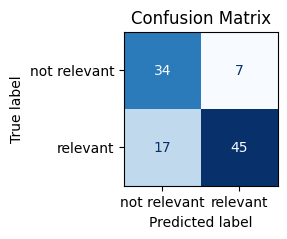

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)

# Get current axis and adjust figure size to fit the matrix
plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(cm.shape[1], cm.shape[0])  # Set figure size based on matrix dimensions

plt.title('Confusion Matrix')

# Save the figure before showing
plt.savefig('./img/confusion_relevant_ori_trafbal') #_ori_trafbal'

plt.show()


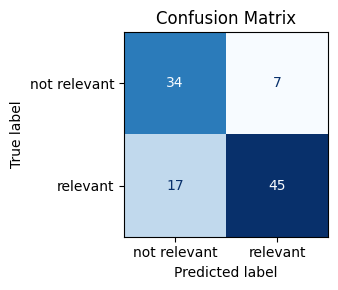

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix') #put title before to avoid cropping
plt.gcf().set_size_inches(4, 3) 

# Prevent cropping
plt.tight_layout()

plt.savefig('./img/confusion_relevant_ori_trafbal.png') # Save the figure before showing
plt.show()

holala Testing the commit history

save model

In [52]:
model_json = model.to_json()
with open("./model/relevant_arch__ori_trafbal.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('./model/relevant_w_ori_trafbal.h5')

medium

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

# Define the model architecture
model = Sequential()

# Add an embedding layer to convert input sequences to dense vectors
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

# Add a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=True)))

# Add a dense output layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

old code

In [1]:
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))


# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)




NameError: name 'model' is not defined

ROC AUC: 0.500


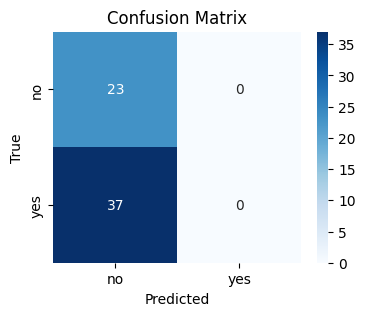

In [55]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(Y_test, y_pred)
print('ROC AUC: %.3f' % score)
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()